In [1]:
# increase font size
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
import mpmath as mp
import scipy as sci
import scipy.special as special
import scipy.constants as const
import scipy.optimize as optimize
from scipy import linalg as LA
# Customizations
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage[T1, OT1]{fontenc}',
       r'\usepackage[euler]{textgreek}',
       r'\usepackage[version=4]{mhchem}',
       r'\usepackage{siunitx}',
       r'\sisetup{detect-all}',
       r'\usepackage{helvet}',
       r'\usepackage{sansmath}',
       r'\sansmath',
       r'\usepackage{physics}'
] 
from IPython.display import *
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('darkgrid', {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
sns.set_style("ticks")

<ipython-input-2-5dbcc60dd044>:17: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [


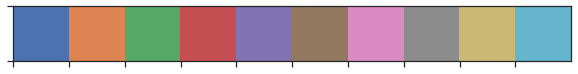

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

In [4]:
import os
import glob

In [5]:
# read all datafiles
for fname in glob.glob("*.json"):
    bname = fname.split('.')[0]
    if (bname.split('_')[0] != 'res'):
        print("Reading file: {}, output: {}".format(bname, fname))
        exec('{}_df = pd.read_json("{}")'.format(bname, fname))

Reading file: usa_total_clusters, output: usa_total_clusters.json
Reading file: canada_clusters, output: canada_clusters.json
Reading file: ocity_dcities_lang_clusters, output: ocity_dcities_lang_clusters.json
Reading file: canada_cities, output: canada_cities.json
Reading file: canada_total_clusters, output: canada_total_clusters.json
Reading file: usa_clusters, output: usa_clusters.json
Reading file: usa_cities, output: usa_cities.json
Reading file: canada_total, output: canada_total.json
Reading file: ocity_dcities_clusters, output: ocity_dcities_clusters.json
Reading file: usa_total, output: usa_total.json


In [6]:
ocity_dcities_clusters_df['OCluster'].max()

3

In [7]:
def cluster_data(clusters_df=ocity_dcities_clusters_df, fname='res_cluster_data.json'):
    jsonf = open(fname, 'w')

    jsonf.write('{\n"nodes": [\n')

    for r in clusters_df.iterrows():
        jsonf.write('\t{{"id": "{}", "group": {}}},\n'.format(r[1][0], r[1][1]))

    for r in canada_clusters_df.iterrows():
        jsonf.write('\t{{"id": "{}", "group": {}}},\n'.format(r[1][0], r[1][7]+4))
    # delete last colon
    jsonf.seek(jsonf.tell() - 2, os.SEEK_SET)    
    jsonf.write('\n')
    jsonf.write('\t],')


    jsonf.write('\n"links": [\n')

    for r in clusters_df.iterrows():
        jsonf.write('\t{{"source": "{}", "target": "{}", "value": {}}},\n'.format(r[1][0], r[1][2], r[1][3]+4))
        jsonf.write('\t{{"source": "{}", "target": "{}", "value": {}}},\n'.format(r[1][0], r[1][4], r[1][5]+4))
        jsonf.write('\t{{"source": "{}", "target": "{}", "value": {}}},\n'.format(r[1][0], r[1][6], r[1][7]+4))
    # delete last colon
    jsonf.seek(jsonf.tell() - 2, os.SEEK_SET)    
    jsonf.write('\n')
    jsonf.write( '\t]\n}')


    jsonf.close()

In [8]:
cluster_data()

In [9]:
cluster_data(ocity_dcities_lang_clusters_df, 'res_cluster_data_lang.json')

In [10]:
usa_total_df.columns

Index(['Location', 'State', 'Latitude', 'Longitude', 'English', 'French',
       'Arabic', 'Mandarin', 'Spanish', 'Bengali', 'German', 'Urdu', 'Russian',
       'Hindi', 'Cantonese', 'Nepali', 'Portuguese', 'Italian', 'Tamil',
       'Albanian', 'Gujarati', 'Swahili', 'Polish', 'Korean', 'Malayalam',
       'Bulgarian', 'Norwegian', 'Dutch', 'Icelandic', 'Romanian', 'Japanese',
       'Vietnamese', 'Danish', 'Pashto', 'Turkish', 'Czech', 'Greek',
       'Amharic', 'Afrikaans', 'Marathi', 'Malay', 'Telugu', 'Ukrainian',
       'Hungarian', 'Thai', 'Kannada', 'Finnish', 'Serbian', 'Swedish',
       'Croatian', 'Ilocano', 'Burmese', 'Hebrew', 'Welsh', 'Estonian',
       'Malagasy', 'Slovak', 'Kurdish', 'Tibetan', 'Hakka', 'Macedonian',
       'Mongolian', 'Armenian', 'Kashmiri', 'Bikol', 'Blackfoot', 'Sindhi',
       'Pangasinan', 'Fijian', 'Dakota', 'Tlingit', 'Haida', 'Yiddish',
       'Tsimshian', 'Cayuga', 'Frisian', 'Mohawk', 'Oneida', 'Kutenai',
       'Lithuanian', 'TransportScaled

In [130]:
usa_scores = np.loadtxt('usa_clusters_centroid.txt', delimiter=',')
# np.array([[0.78645833, 0.75378311, 0.56390163, 0.45504009, 0.1955711],
#                        [0.3742284, 0.63121078, 0.64114859, 0.28102158, 0.16653717],
#                        [0.66382576, 0.6843391,  0.44936471, 0.33865317, 1.       ],
#                        [0.48958333, 0.27344877, 0.74658764, 0.20402602, 0.3021978]])

In [131]:
def radar_plot(scores, title = "U.S. cities clustering", init=1):
    """ Plot a radar plot
        With ideas from https://www.pythoncharts.com/2019/04/16/radar-charts/ and 
        https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
    """
    columns  = np.array(['TransportScaledScore', 'ParksScaledScore', 'CostScaledScore', 'HealthScaledScore', 'WealthScaledScore'])
    angles = np.linspace(0, 2*np.pi, len(columns), endpoint=False)

    all_scores = [np.concatenate((sc,[sc[0]])) for sc in scores]
    angles =np.concatenate((angles,[angles[0]]))

    fig= plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)
    for i, sc in enumerate(all_scores):
        ax.plot(angles, sc, 'o-', color=current_palette[(i+init-1)%len(current_palette)], linewidth=2)
        ax.fill(angles, sc, alpha=0.25, color=current_palette[(i+init-1)%len(current_palette)])
    ax.grid(True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(angles[:-1] * 180/np.pi, columns, alpha=1)
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
            label.set_bbox({"facecolor": "white", "alpha":0.65, "edgecolor": "black", "boxstyle": "round"})
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
            label.set_bbox({"facecolor": "white", "alpha":0.65, "edgecolor": "black", "boxstyle": "round"})
        else:
            label.set_horizontalalignment('right')
            label.set_bbox({"facecolor": "white", "alpha":0.65, "edgecolor": "black", "boxstyle": "round"})
    ax.set_title(title, loc='left')
    
    legend = ax.legend(["Cluster {}".format(i+init) for i in range(len(all_scores))], loc=(-.3, .2), labelspacing=0.1)
    #plt.tight_layout()
    plt.show()

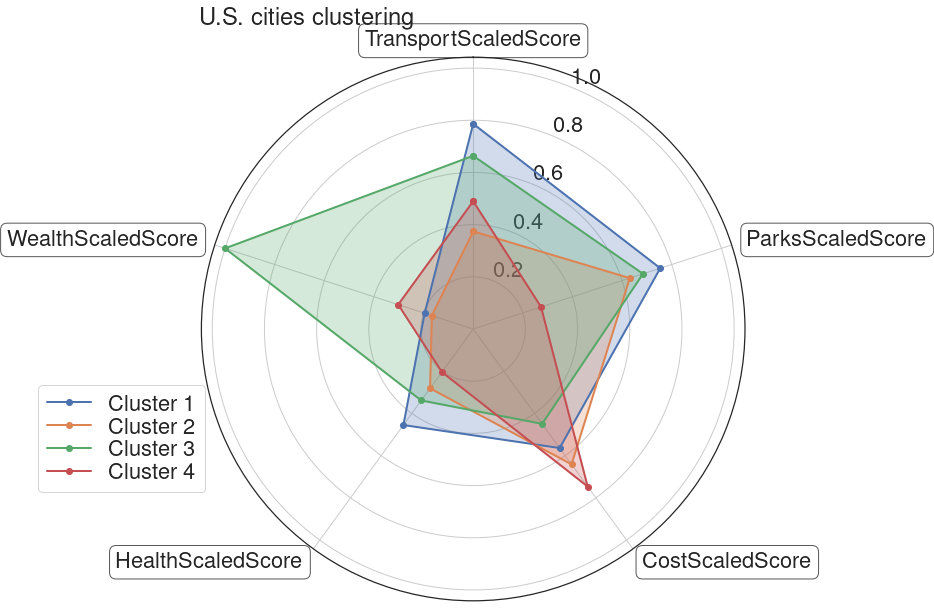

In [132]:
radar_plot(usa_scores)

In [133]:
canada_scores = np.loadtxt('canada_clusters_centroid.txt', delimiter=',')

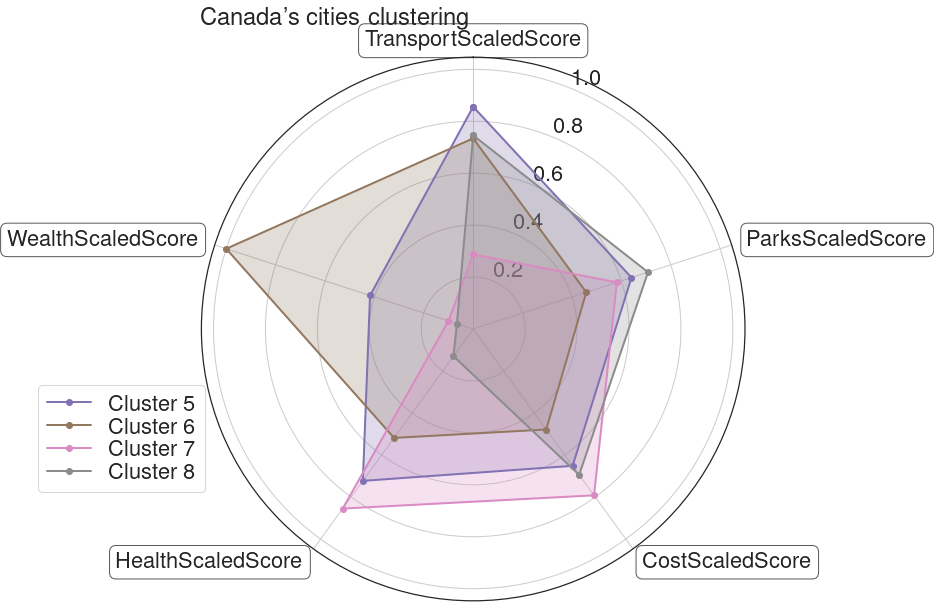

In [134]:
radar_plot(canada_scores, title="Canada's  cities clustering", init=5)

In [62]:
[dict(facecolor='red', alpha=0.5)]*5

[{'facecolor': 'red', 'alpha': 0.5},
 {'facecolor': 'red', 'alpha': 0.5},
 {'facecolor': 'red', 'alpha': 0.5},
 {'facecolor': 'red', 'alpha': 0.5},
 {'facecolor': 'red', 'alpha': 0.5}]